In [1]:
import sqlite3
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from data_exploration.helper import (
                                        fetch_table,
                                        prepare_temperature_change_data_for_maps
                                    )

from data_exploration.visualization import (
                                                plot_overall_average_temperature_change,
                                                plot_compare_countries_temperature_trend,
                                                plot_average_temperature_change_map
                                            )

In [2]:
db_path = '../data/climate_data_final.db'
conn = sqlite3.connect(db_path)

In [3]:

table_name = 'Annual_Surface_Temperature_Change'
annual_surface_temp_change_df = fetch_table(conn, table_name)

print(f"Table: {table_name}")
display(annual_surface_temp_change_df.head())

conn.close()

Table: Annual_Surface_Temperature_Change


,Country,ISO3,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,"Afghanistan, Islamic Rep. of",AFG,-0.294,0.220,0.430,0.359,-0.116,0.471,0.675,1.198,...,1.397,0.223,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498
1,Albania,ALB,0.106,0.076,1.330,-0.172,-0.038,0.075,0.795,0.670,...,1.055,1.487,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498
2,Algeria,DZA,-0.312,0.552,0.732,0.595,0.846,1.059,1.109,1.476,...,1.398,1.147,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926
3,American Samoa,ASM,0.344,-0.069,0.189,0.755,0.784,NaN,NaN,0.242,...,0.854,0.924,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430
4,"Andorra, Principality of",AND,0.386,0.174,1.508,1.279,0.570,1.788,1.018,1.055,...,1.677,1.265,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562


In [4]:
annual_surface_temp_change_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  225 non-null    object 
 1   ISO3     225 non-null    object 
 2   1992     208 non-null    float64
 3   1993     209 non-null    float64
 4   1994     208 non-null    float64
 5   1995     210 non-null    float64
 6   1996     210 non-null    float64
 7   1997     207 non-null    float64
 8   1998     210 non-null    float64
 9   1999     209 non-null    float64
 10  2000     209 non-null    float64
 11  2001     208 non-null    float64
 12  2002     212 non-null    float64
 13  2003     214 non-null    float64
 14  2004     213 non-null    float64
 15  2005     212 non-null    float64
 16  2006     215 non-null    float64
 17  2007     217 non-null    float64
 18  2008     212 non-null    float64
 19  2009     212 non-null    float64
 20  2010     215 non-null    float64
 21  2011     217 non

In [5]:
annual_surface_temp_change_df.describe()

,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,208.000000,209.000000,208.000000,210.000000,210.000000,207.000000,210.000000,209.000000,209.000000,208.000000,...,217.000000,215.000000,216.000000,216.000000,216.000000,213.000000,214.000000,213.000000,213.000000,212.000000
mean,0.236490,0.215986,0.609514,0.629238,0.279229,0.543995,0.971252,0.743301,0.669789,0.850154,...,0.821392,0.902223,0.931199,1.114815,1.269773,1.439521,1.280785,1.302113,1.443061,1.552038
std,0.565235,0.404519,0.490914,0.441625,0.413852,0.483088,0.388007,0.450274,0.530464,0.470992,...,0.394880,0.442113,0.321595,0.564903,0.462162,0.401091,0.393999,0.596786,0.467510,0.621930
min,-1.344000,-1.355000,-0.425000,-0.330000,-0.787000,-0.429000,-0.607000,-0.273000,-0.718000,-0.186000,...,-0.478000,-0.128000,0.118000,-0.092000,-0.430000,0.250000,0.017000,0.238000,0.050000,0.229000
25%,-0.006750,0.012000,0.299000,0.377750,0.018250,0.255500,0.777500,0.456000,0.298000,0.505000,...,0.564000,0.588500,0.743500,0.744000,1.017750,1.147000,1.027500,0.865000,1.169000,1.161750
50%,0.298500,0.281000,0.487500,0.632000,0.311000,0.547000,1.005000,0.640000,0.537000,0.728500,...,0.763000,0.808000,0.897000,0.986500,1.215000,1.446000,1.282000,1.125000,1.412000,1.477000
75%,0.529500,0.484000,0.826750,0.808000,0.518000,0.816500,1.193500,1.032000,0.996000,1.281250,...,1.091000,1.185500,1.187500,1.335500,1.520500,1.714000,1.535000,1.834000,1.698000,1.826250
max,1.601000,1.097000,1.958000,2.101000,1.598000,1.933000,2.470000,2.064000,2.066000,1.992000,...,1.704000,2.144000,1.643000,2.704000,2.613000,2.459000,2.493000,2.772000,2.689000,3.691000


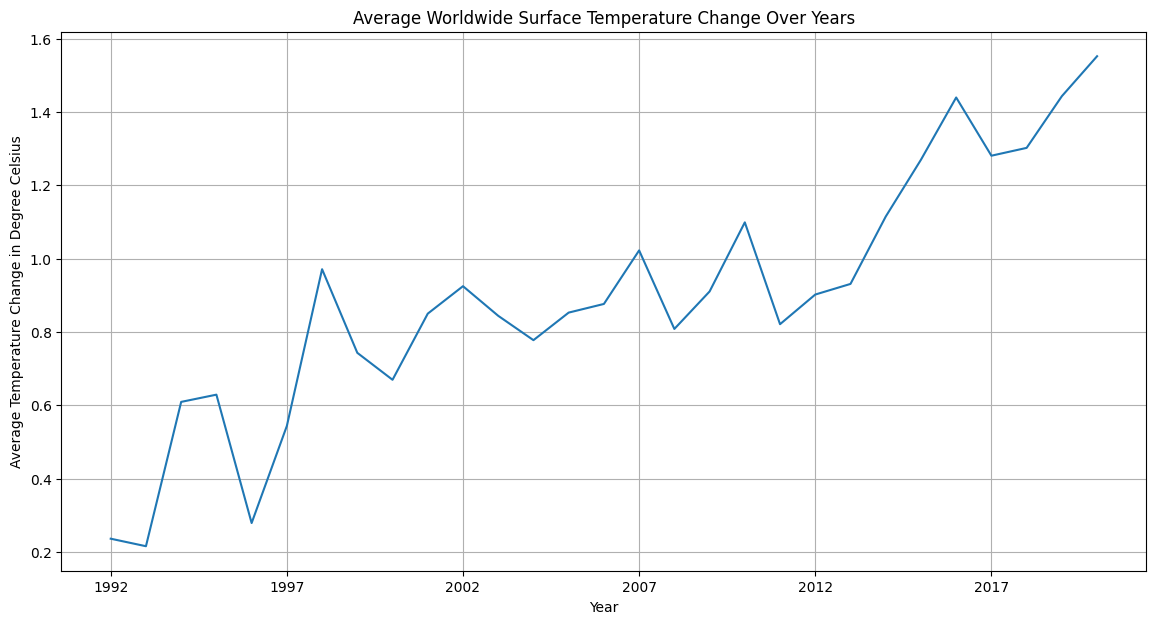

In [6]:
plot_overall_average_temperature_change(annual_surface_temp_change_df)

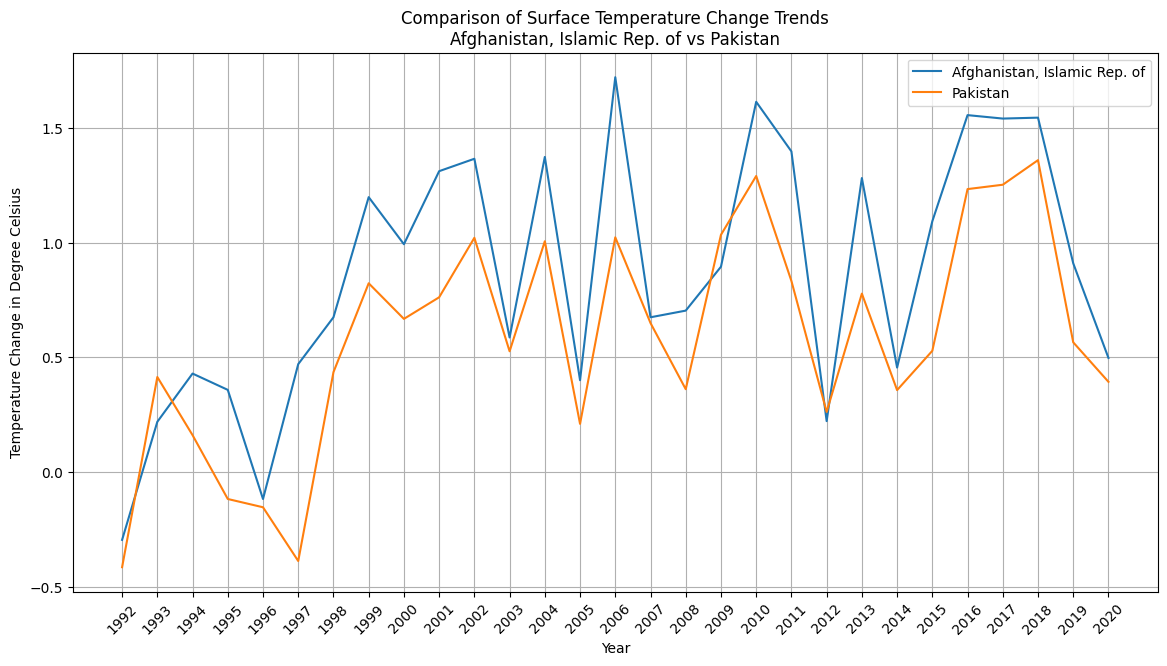

In [7]:
plot_compare_countries_temperature_trend(annual_surface_temp_change_df, 'Afghanistan, Islamic Rep. of', 'Pakistan')

c:\Users\hassa\advance_data_engineering\project\data_exploration\helper.py:45: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


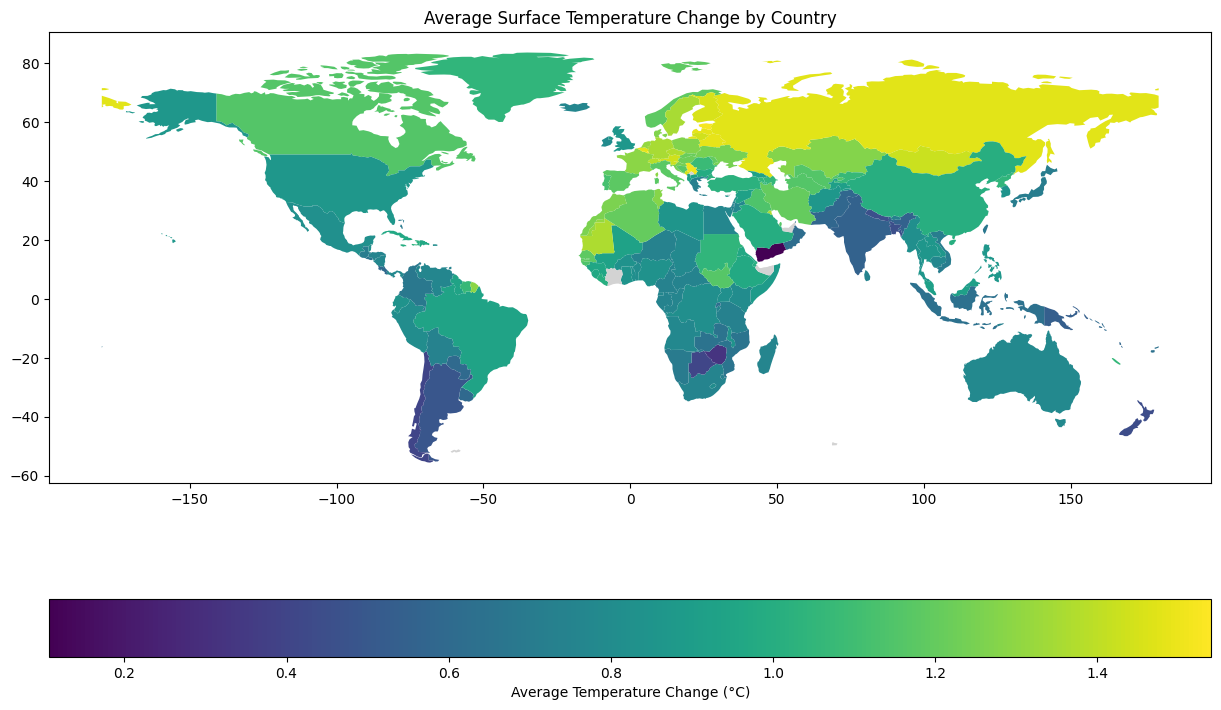

In [9]:
merged_data = prepare_temperature_change_data_for_maps(annual_surface_temp_change_df)

plot_average_temperature_change_map(merged_data)